# 第8章：データのプロット

## プロット用のライブラリ

In [1]:
# CELL PROVIDED

# %pip install -q japanize-matplotlib-jlite py4macro

In [2]:
# CELL PROVIDED

import japanize_matplotlib_jlite
import numpy as np
import matplotlib.pyplot as plt
import py4macro
import random

# 以下は試験範囲外（プロットのサイズを調整する）
plt.rcParams['figure.figsize'] = (5, 3.75)

＜説明＞
* `matplotlib.pyplot`：図示のためのパッケージ`matplotlib`の中にあるモジュール`pyplot`（`plt`として読み込む）
* `japanize_matplotlib_jlite`：`matplotlib`を日本語化するモジュール
* 以下は試験範囲外    
    * `plt.rcParams['figure.figsize'] = (5, 3.75)`：表示されるプロットの大きさを指定する。
    * `%pip install -q japanize-matplotlib-jlite py4macro`：`japanize-matplotlib-jlite`と`py4macro`をインストールする。

## ラインプロット

折れ線グラフや関数の平面グラフをプロットする際に使う。

### 書き方

```
plt.plot(＜横軸の値＞,＜縦軸の値＞)
```

コード8.2.1

In [3]:
# CELL PROVIDED

x = [1, 2, 3]
y = [10, 30, 20]

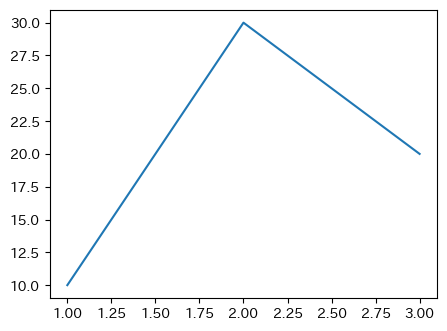

In [4]:
plt.plot(x, y)
plt.show()      # 省略可、passでも良い

### 曲線のプロット

モジュール`py4macro`に含まれる`xvalues()`関数を使う。

In [5]:
help(py4macro.xvalues)

Help on function xvalues in module py4macro.py4macro:

xvalues(low, high, number)
    引数
        low：最小値（lowest value）
        high：最大値（highest value）
        number：作成する数値の数を指定する（正の整数型，number of values）
    戻り値
        number個の要素から構成されるリスト



コード8.2.2

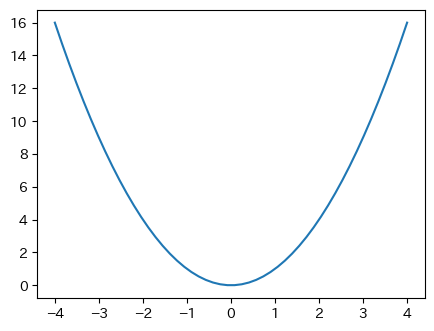

In [6]:
x = py4macro.xvalues(-4, 4, 50)
y = [i ** 2 for i in x]

plt.plot(x, y)
plt.show()

＜標準正規分布＞
$$
f(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}
$$

NumPyの定数

In [7]:
np.pi

3.141592653589793

コード8.2.3

In [8]:
# CELL PROVIDED

def normal_dist(z):
    
    f = np.exp( -z**2 / 2 ) / ( 2*np.pi )**(0.5)
    
    return f

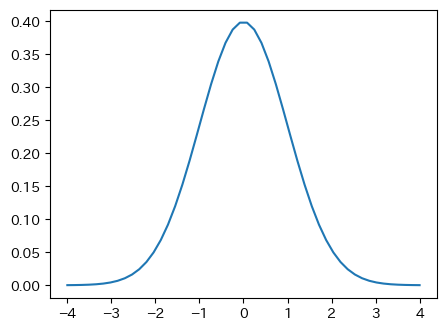

In [9]:
y = [normal_dist(i) for i in x]

plt.plot(x, y)
plt.show()

### 重ねてプロット

＜正規分布＞
$$
f(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}},
\qquad
f(z-2.5) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(z-2.5)^2}{2}}
$$

コード8.2.4

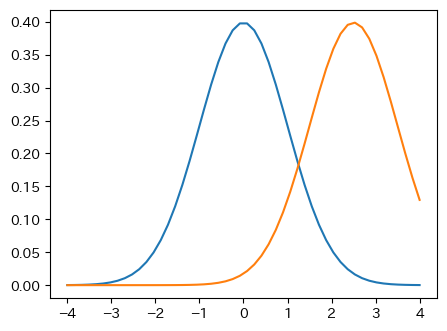

In [10]:
y0 = [normal_dist(i) for i in x]
y1 = [normal_dist(i-2.5) for i in x]

plt.plot(x, y0)
plt.plot(x, y1)
plt.show()

コード8.2.5

In [11]:
# CELL PROVIDED

x = [1, 2, 3]
y0 = [10, 30, 25]
y1 = [30, 10, 15]

コード8.2.6 (`plt.plot(x, y0)`は省略)

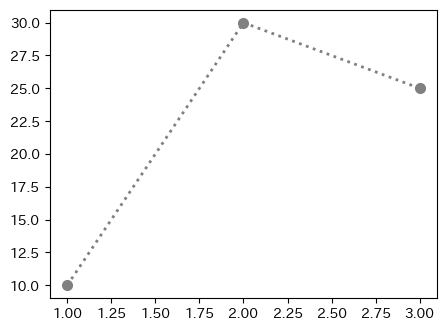

In [12]:
plt.plot(x, y0,
         linestyle=":",      # 線のスタイル
         linewidth=2,        # 線の幅
         color="grey",       # 線の色
         marker="o",         # 座標のマーカー
         markersize=7        # マーカーの大きさ
        )
plt.show()

### その他の「飾り付け」

コード8.2.7

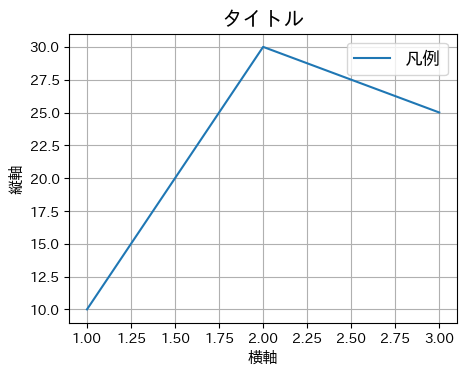

In [13]:
plt.plot(x, y0,
         label="凡例",           # 凡例
         # color="black"
        )
plt.title("タイトル", size=15)   # タイトル
plt.xlabel("横軸", size=11)     # 横軸のラベル
plt.ylabel("縦軸", size=11)     # 縦軸のラベル
plt.legend(fontsize=13)        # 凡例の表示
plt.grid()                     # グリッド線
plt.show()

コード8.2.8

```
plt.figure(figsize=(6.4, 4.8))
```
を最初に書く（数値は例）。
* `6.4`の位置は横幅を指定
* `4.8`の位置は縦幅を指定

## ヒストグラム

書き方（histogramの略）

```
plt.hist(＜値＞)
```

コード8.3.1

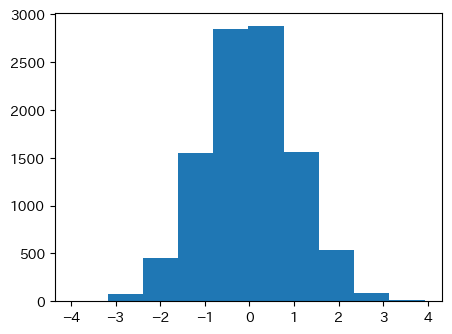

In [14]:
z0 = [random.gauss() for _ in range(10_000)]

plt.hist(z0)
plt.show()

コード8.3.2

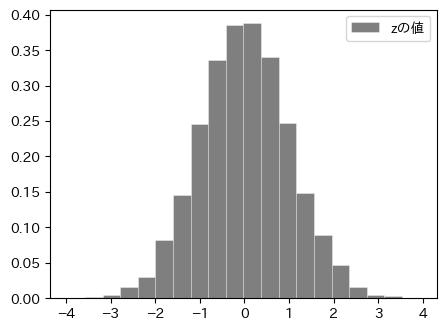

In [15]:
plt.hist(z0,
         bins = 20,            # 階級の数
         linewidth=0.5,        # 棒の間隔
         color="black",        # 棒の色
         edgecolor="white",    # 棒の境界線の色
         alpha=0.5,            # 透明度
         label="zの値",         # 凡例
         density=True          # 縦軸を相対度数にする
        )
plt.legend()
plt.show()

コード8.3.3

In [16]:
z1 = [random.gauss(2, 2) for _ in range(10_000)]

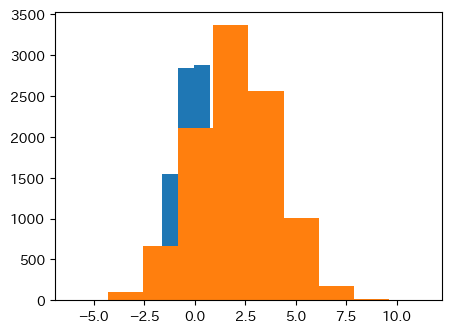

In [17]:
# CELL PROVIDED

plt.hist(z0,
         # bins = 10,            # 階級の数
         # color="black",        # 棒の色
         # edgecolor="white",    # 棒の境界線の色
         # alpha=0.5,            # 透明度
         # label="z0"            # 凡例
        )
plt.hist(z1,
         # bins = 20,            # 階級の数
         # color="white",        # 棒の色
         # edgecolor="black",    # 棒の境界線の色
         # alpha=0.5,            # 透明度
         # label="z1"            # 凡例
        )
# plt.title("z0とz1のヒストグラム", size=12)   # タイトル
# plt.legend(fontsize=8)                    # 凡例の表示
plt.show()

## 散布図

授業では扱わない